# Notebook for Comparing Optimal Neural Network Architecture
- use results from `NN_Grid_Search.ipynb`

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.colors as colors
plt.style.use(plt.style.available[11])

In [4]:
grids = [None, None, None, None]
for i in range(len(grids)):
    with open('nn_cv_results/grid_search_4.pkl'.format(i+1), 'rb') as f:
        grids[i] = pickle.load(f)

In [5]:
scores = []
pairs = []
stds = []
pairs_str = []
for i in range(len(grids)):
    len_grid = len(grids[i]['params'])
    scores += list(grids[i]['mean_test_score'])
    stds += list(grids[i]['std_test_score'])
    pairs += [(i+1, grids[i]['params'][j]['module__n_neurons']) for j in range(len_grid)]
    pairs_str += ['({}, {})'.format(i+1, grids[i]['params'][j]['module__n_neurons']) for j in range(len_grid)]
scores = np.array(scores)
stds = np.array(stds)
pairs = np.array(pairs, dtype=np.dtype([('field1', int), ('field2', int)]))
pairs_str = np.array(pairs_str, dtype=str)
print(scores)
print(stds)
print(pairs)
print(pairs_str)

[-0.00808938 -0.00592052 -0.00637217 -0.00808938 -0.00592052 -0.00637217
 -0.00808938 -0.00592052 -0.00637217 -0.00808938 -0.00592052 -0.00637217]
[0.00033865 0.00031838 0.00040614 0.00033865 0.00031838 0.00040614
 0.00033865 0.00031838 0.00040614 0.00033865 0.00031838 0.00040614]
[(1, 16) (1, 32) (1, 64) (2, 16) (2, 32) (2, 64) (3, 16) (3, 32) (3, 64)
 (4, 16) (4, 32) (4, 64)]
['(1, 16)' '(1, 32)' '(1, 64)' '(2, 16)' '(2, 32)' '(2, 64)' '(3, 16)'
 '(3, 32)' '(3, 64)' '(4, 16)' '(4, 32)' '(4, 64)']


Number of parameters in neural network 
- 1 for each connection between adjacent layers
- 1 bias term for each hidden layer (and output layer)
- below formula works for when number of neurons per layer is constant

In [6]:
def n_params(n_layers, n_neurons):
    return 3 + 7*n_neurons + n_neurons*(n_neurons+1)*(n_layers-1)

In [7]:
weights = np.array([n_params(*pairs[i:i+1][0]) for i in range(len(pairs))])
print(weights)

[  115   227   451   387  1283  4611   659  2339  8771   931  3395 12931]


<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
C:\Users\aadit\AppData\Local\Temp\ipykernel_2056\2740203381.py:17: SyntaxWarning: invalid escape sequence '\c'
  cbar.set_ticklabels(['$10^3$', '$10^4$', '$5 \cdot 10^4$'])


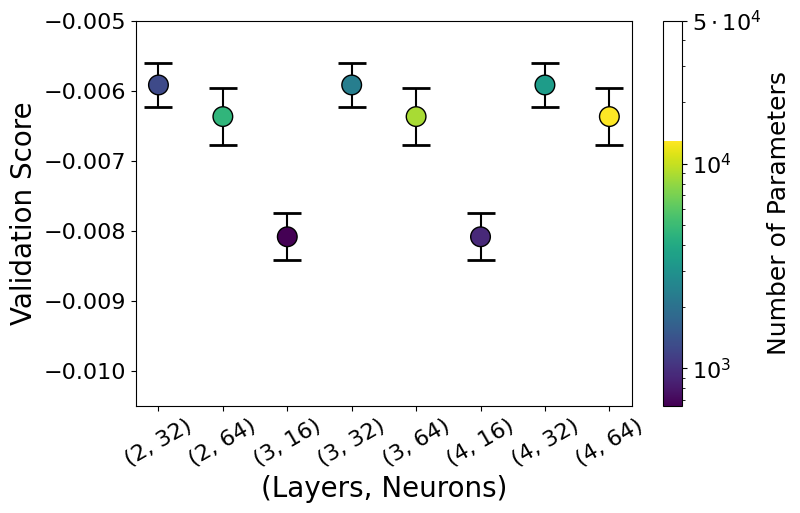

In [25]:
i_list = [4,5,6, 7,8,9, 10,11]
fig, ax = plt.subplots(figsize=(8,5))
#ax.grid()
ax.set_axisbelow(True)
ax.errorbar(range(len(scores[i_list])), scores[i_list], yerr=stds[i_list], color='black', capsize=10, capthick=2, fmt='.', zorder=1)
p = ax.scatter(range(len(scores[i_list])), scores[i_list], s=200, marker='o', cmap='viridis', c=weights[i_list], edgecolors='k', norm=colors.LogNorm(), zorder=2)
ax.set_xticks(range(len(scores[i_list])))
ax.set_xticklabels(pairs_str[i_list])
ax.set_ylim([-0.0105, -0.005])
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel('Validation Score', fontsize=20)
ax.set_xlabel('(Layers, Neurons)', fontsize=20)
ax.tick_params(axis='x', rotation=30)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([1e3, 1e4, 5e4])
cbar.set_ticklabels(['$10^3$', '$10^4$', '$5 \cdot 10^4$'])
cbar.set_label('Number of Parameters', fontsize=18)
fig.savefig('plots/grid_search_layers.eps', dpi=300, bbox_inches='tight')
fig.savefig('plots/grid_search_layers.jpeg', dpi=300, bbox_inches='tight')